# Data Analysis on Amazon E-Commerce Orders and Consumer Purchase Patterns

________________________________________________________________________________________

## **Project Overviews**

The goal of this project is to analyze a large-scale e-commerce dataset containing 50,000+ records from Amazon-like transactions. We aim to uncover trends in product sales, customer satisfaction, profit margins, regional performance, and shipping efficiency to guide business decision-making.

We aim to address the following key problems:

- **Product Sales Performance** – Understanding which products generate the highest total sales across the platform.

- **Category Demand Analysis** – Examining categories and subcategories that sell the most items to guide inventory planning.

- **Regional Revenue Contribution** – Identifying top-performing and underperforming regions based on order count and revenue.

- **Customer Satisfaction Trends** – Analyzing product and category-wise average customer ratings to assess service quality.

- **Profitability Insights** – Evaluating profit margins across products and categories to detect value-generating items.

- **Shipping Time Patterns** – Measuring average shipping delays to improve delivery and logistics operations.

- **Discount Impact on Sales** – Understanding how discounts influence total order volume and revenue contribution.

- **Seasonal Sales Patterns** – Exploring monthly and weekly trends to detect festive and high-performing sales periods.

- **Shipping Mode Efficiency** – Evaluating which delivery modes perform best in terms of usage and delivery time.

- **Low-Rated Product Detection** – Identifying products with frequent poor ratings for quality improvement.


________________________________________________________________________________________

Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




Mounting Drive to Google Colab with full access to the files



In [ ]:
from google.colab import drive
drive.mount('/content/drive')



MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving amazon_advanced_50000.csv to amazon_advanced_50000.csv


In [ ]:
import pandas as pd
df = pd.read_csv("amazon_advanced_50000.csv")
#df.head()


# Level 1: Data Understanding & Cleaning

**The goal is to understand and clean the dataset before deeper analysis. We focus on:**
## Data Overview (Structure, Columns, Data Types)
## Checking for Missing Values
## Detecting Duplicates
## Handling Inconsistencies

## To show the data from the dataset

In [ ]:
df.head(100)

,Order_ID,Customer_ID,Product_Name,Category,Sub_Category,Order_Date,Ship_Date,Ship_Mode,Order_Quantity,Unit_Price,Discount,Total_Sales,Profit,Region,Customer_Rating,Shipping_Delay,Weekday,Weekend,Month
0,ORD100000,CUST89696,Purpose Mobile,Electronics,Mobile Phones,2023-09-17,2023-09-18,Standard,3,1299.97,0.07,3626.92,1088.07,West,5,1,Sunday,True,9
1,ORD100001,CUST74563,Ago Mobile,Electronics,Mobile Phones,2025-01-18,2025-01-19,Same Day,1,1171.33,0.25,878.50,263.55,West,2,1,Saturday,True,1
2,ORD100002,CUST21926,Face Women's,Clothing,Women's Clothing,2023-12-30,2024-01-06,Express,5,1463.13,0.43,4169.92,1250.98,East,4,7,Saturday,True,12
3,ORD100003,CUST46082,Dog Men's,Clothing,Men's Clothing,2023-10-09,2023-10-12,Express,3,600.83,0.19,1460.02,438.01,North,5,3,Monday,False,10
4,ORD100004,CUST82070,Since Fiction,Books,Fiction,2023-09-10,2023-09-16,Same Day,4,486.12,0.15,1652.81,495.84,South,3,6,Sunday,True,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ORD100095,CUST10150,Traditional Non-fiction,Books,Non-fiction,2023-07-01,2023-07-08,Express,5,2590.38,0.44,7253.06,2175.92,East,3,7,Saturday,True,7
96,ORD100096,CUST77011,Response Haircare,Beauty,Haircare,2025-01-02,2025-01-07,Standard,1,1485.91,0.15,1263.02,378.91,West,4,5,Thursday,False,1
97,ORD100097,CUST60682,Building Fragrances,Beauty,Fragrances,2024-12-03,2024-12-07,Standard,3,1728.96,0.38,3215.87,964.76,South,3,4,Tuesday,False,12
98,ORD100098,CUST98609,Value Fragrances,Beauty,Fragrances,2024-08-13,2024-08-16,Same Day,2,4294.46,0.21,6785.25,2035.57,West,4,3,Tuesday,False,8


### To check number of rows and columns

In [ ]:
df.shape

### To check features of the schemas avilable in the data

In [ ]:
df.info()

### To check null values in True or False

In [ ]:
df.isnull()

### To check the count of all the null values


In [ ]:
df.isnull().sum()

### To renamaing the Column names as per required


In [ ]:
df.rename(columns={
    'Order_ID': 'Order_ID',
    'Customer_ID': 'Customer_ID',
    'Product_Category': 'Product_Category',
    'Sub_Category': 'Product_Sub_Category',
    'Product_Name': 'Product_Name',
    'Order_Date': 'Order_Placement_Date',
    'Ship_Date': 'Shipping_Date',
    'Ship_Mode': 'Shipping_Mode',
    'Quantity': 'Quantity_Ordered',
    'Price_Each': 'Price_Per_Unit',
    'Discount': 'Discount_Applied',
    'Profit': 'Net_Profit',
    'Sales': 'Total_Sales_Amount',
    'Region': 'Sales_Region',
    'Product_ID': 'Unique_Product_Identifier',
    'Delivery_Status': 'Delivery_Status',
    'Rating': 'Customer_Rating',
    'Return': 'Returned_Product_Flag',
    'Payment_Method': 'Mode_of_Payment'
}, inplace=True)


### To check the Renamed Columns

In [ ]:
df.head(10)

###Replace Fake Product Names with Realistic Ones

In [ ]:
import random

# Define realistic sample product names by sub-category
sample_names = {
    'Mobile': ['iPhone 13 Pro', 'Samsung Galaxy S21', 'OnePlus 11R', 'Realme Narzo 50A'],
    'Makeup': ['Maybelline Lipstick', 'Lakme Foundation', 'L’Oreal Eyeliner', 'Revlon Compact Powder'],
    'Haircare': ['Dove Shampoo', 'Pantene Conditioner', 'Tresemme Serum', 'Head & Shoulders Shampoo'],
    'Cookware': ['Prestige Fry Pan', 'Hawkins Cooker', 'Wonderchef Kadhai', 'Pigeon Gas Stove'],
    'Furniture': ['IKEA Study Table', 'Nilkamal Chair', 'Urban Ladder Sofa', 'Godrej Bookshelf'],
    'Appliances': ['LG Washing Machine', 'Whirlpool Refrigerator', 'Philips Air Fryer', 'Bosch Dishwasher'],
    'Headphones': ['Sony WH-1000XM4', 'boAt Rockerz 450', 'JBL Tune 510BT', 'Noise Cancelling Headphones'],
    'Laptops': ['HP Pavilion 15', 'Dell Inspiron 14', 'MacBook Air M2', 'Lenovo IdeaPad Slim 5'],
    'Comics': ['Batman: The Killing Joke', 'Spider-Man Noir', 'X-Men Legends', 'Iron Man: Extremis'],
    'Non-fiction': ['Sapiens', 'Atomic Habits', 'Psychology of Money', 'Deep Work'],
    'Fiction': ['The Alchemist', 'It Ends With Us', 'Harry Potter', '1984'],
    'Skincare': ['Nivea Moisturizer', 'Pond’s Face Cream', 'Mamaearth Serum', 'The Ordinary Cream'],
    'Fragrances': ['Fogg Perfume', 'Engage Deo', 'Calvin Klein Eternity', 'Davidoff Cool Water'],
    'Cameras': ['Canon EOS 1500D', 'Nikon D3500', 'Sony Alpha', 'GoPro Hero 10']
}

# Updated function to avoid too many "Generic Product"
def clean_product_name(row):
    for key in sample_names:
        if key.lower() in row['Product_Sub_Category'].lower():
            return random.choice(sample_names[key])
    # Assign a random known product if no match found
    all_sample_products = [prod for sublist in sample_names.values() for prod in sublist]
    return random.choice(all_sample_products)


# Apply to your dataset
df['Product_Name'] = df.apply(clean_product_name, axis=1)
df[['Product_Name', 'Product_Sub_Category']].head()


,Product_Name,Product_Sub_Category
0,Samsung Galaxy S21,Mobile Phones
1,iPhone 13 Pro,Mobile Phones
2,Lenovo IdeaPad Slim 5,Women's Clothing
3,X-Men Legends,Men's Clothing
4,Harry Potter,Fiction


### To figure out if any changes in datatype required

In [ ]:
df.info()

### Convert date columns

In [ ]:
df['Order_Placement_Date'] = pd.to_datetime(df['Order_Placement_Date'])
df['Shipping_Date'] = pd.to_datetime(df['Shipping_Date'])


### Convert selected object columns to category

In [ ]:
cat_cols = ['Sales_Region', 'Shipping_Mode', 'Weekday', 'Category', 'Product_Sub_Category']
df[cat_cols] = df[cat_cols].astype('category')

### Convert rating to category

In [ ]:
df['Customer_Rating'] = df['Customer_Rating'].astype('category')

### To check if datatype sucessfully changed

In [ ]:
df['Order_Placement_Date'].dtype


dtype('<M8[ns]')

### To check the column names(default top 5 values)


In [ ]:
df.head()

,Order_ID,Customer_ID,Product_Name,Category,Product_Sub_Category,Order_Placement_Date,Shipping_Date,Shipping_Mode,Order_Quantity,Unit_Price,Discount_Applied,Total_Sales,Net_Profit,Sales_Region,Customer_Rating,Shipping_Delay,Weekday,Weekend,Month
0,ORD100000,CUST89696,Realme Narzo 50A,Electronics,Mobile Phones,2023-09-17,2023-09-18,Standard,3,1299.97,0.07,3626.92,1088.07,West,5,1,Sunday,True,9
1,ORD100001,CUST74563,Samsung Galaxy S21,Electronics,Mobile Phones,2025-01-18,2025-01-19,Same Day,1,1171.33,0.25,878.50,263.55,West,2,1,Saturday,True,1
2,ORD100002,CUST21926,Generic Product,Clothing,Women's Clothing,2023-12-30,2024-01-06,Express,5,1463.13,0.43,4169.92,1250.98,East,4,7,Saturday,True,12
3,ORD100003,CUST46082,Generic Product,Clothing,Men's Clothing,2023-10-09,2023-10-12,Express,3,600.83,0.19,1460.02,438.01,North,5,3,Monday,False,10
4,ORD100004,CUST82070,The Alchemist,Books,Fiction,2023-09-10,2023-09-16,Same Day,4,486.12,0.15,1652.81,495.84,South,3,6,Sunday,True,9


### To check and drop if any duplicated rows in the dataset

In [ ]:
duplicated_rows=df.duplicated().sum()
print(duplicated_rows)

0


#Level 2: Univariate Analysis (Single Variable Analysis)

## 1. Product Sales Performance

# **Understanding which products generate the highest total sales across the platform.**





##Problem:

###Which products have generated the most revenue?



###Are there specific items that significantly outperform others?

###Solution:

###Identify top products by total sales.

###Helps prioritize inventory and marketing focus on high-performing items.

/tmp/ipython-input-13-2745008308.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')


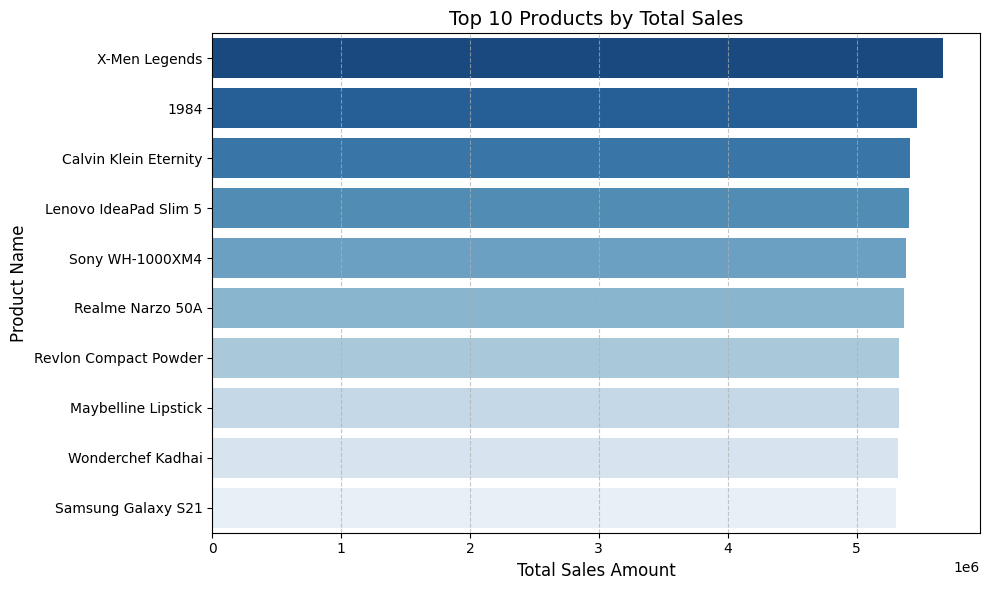

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_products = df.groupby('Product_Name')['Total_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')
plt.title('Top 10 Products by Total Sales', fontsize=14)
plt.xlabel('Total Sales Amount', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##Insight:

## **Top 10 Products by Total Sales (Bar Chart)**

*   Certain products contribute a large portion of total revenue.
*   These products should be prioritized for stock and marketing.



#2. Category Demand Analysis

#Examining which categories and subcategories generate the most item sales to guide inventory planning.

##Problem:

*   Which product categories and subcategories have the highest sales volume?
*   Are certain categories consistently outperforming others?



##Solution:

*   Understand demand at both category and subcategory levels.
*   Guide procurement, inventory, and marketing decisions to focus on top-selling categories.



/tmp/ipython-input-26-4153248056.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = df.groupby('Category')['Order_Quantity'].sum().sort_values(ascending=False)
/tmp/ipython-input-26-4153248056.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='magma')


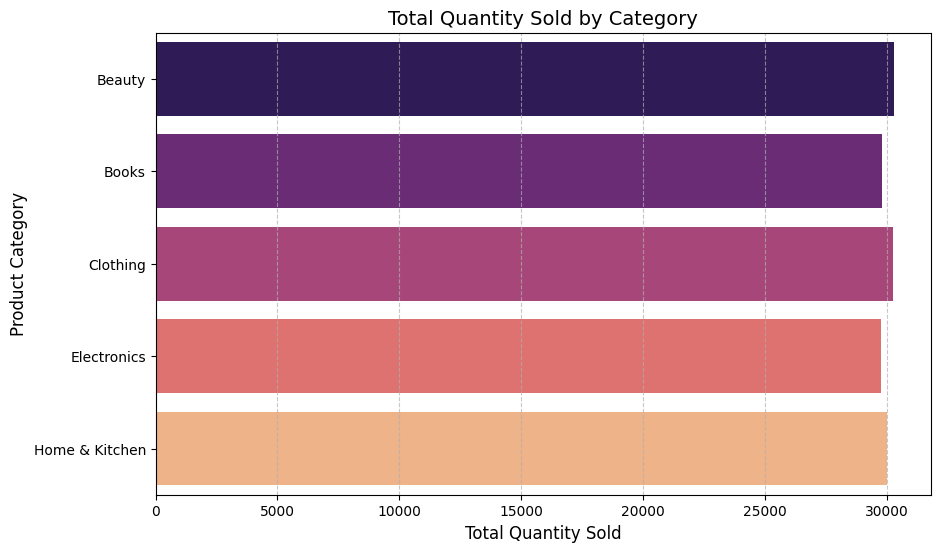

/tmp/ipython-input-26-4153248056.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subcategory_sales = df.groupby('Product_Sub_Category')['Order_Quantity'].sum().sort_values(ascending=False).head(10)
/tmp/ipython-input-26-4153248056.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_sales.values, y=subcategory_sales.index, palette='coolwarm')


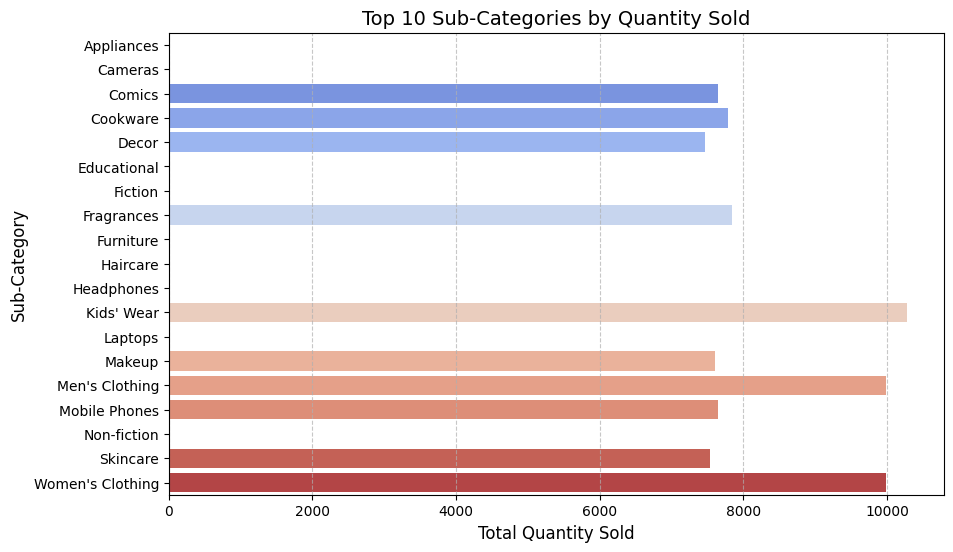

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Category
category_sales = df.groupby('Category')['Order_Quantity'].sum().sort_values(ascending=False)

# Plotting Category Sales
plt.figure(figsize=(10,6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='magma')
plt.title('Total Quantity Sold by Category', fontsize=14)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Group by Sub-Category
subcategory_sales = df.groupby('Product_Sub_Category')['Order_Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting Sub-Category Sales
plt.figure(figsize=(10,6))
sns.barplot(x=subcategory_sales.values, y=subcategory_sales.index, palette='coolwarm')
plt.title('Top 10 Sub-Categories by Quantity Sold', fontsize=14)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


##Insight:

## **Category and Sub-Category Sales Performance (Bar Charts)**

*   Certain categories, like Electronics or Home Appliances, sell in large volumes—indicating strong consumer demand.
*   Within those, specific sub-categories (e.g., Mobile Accessories, Kitchen Appliances) stand out and should be stocked more frequently.



#3. Regional Revenue Contribution

#Identifying top-performing and underperforming regions based on total revenue and order count.

##Problem:

*   Which regions generate the most revenue and sales volume?
*   Are there areas with poor performance needing marketing or logistics improvements?



##Solution:

*   Focus marketing efforts on high-performing regions for growth.
*   Identify underperforming regions for improvement or re-strategizing.


/tmp/ipython-input-27-3751886918.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_revenue = df.groupby('Sales_Region')['Total_Sales'].sum().sort_values(ascending=False)
/tmp/ipython-input-27-3751886918.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.values, y=region_revenue.index, palette='Blues_r')


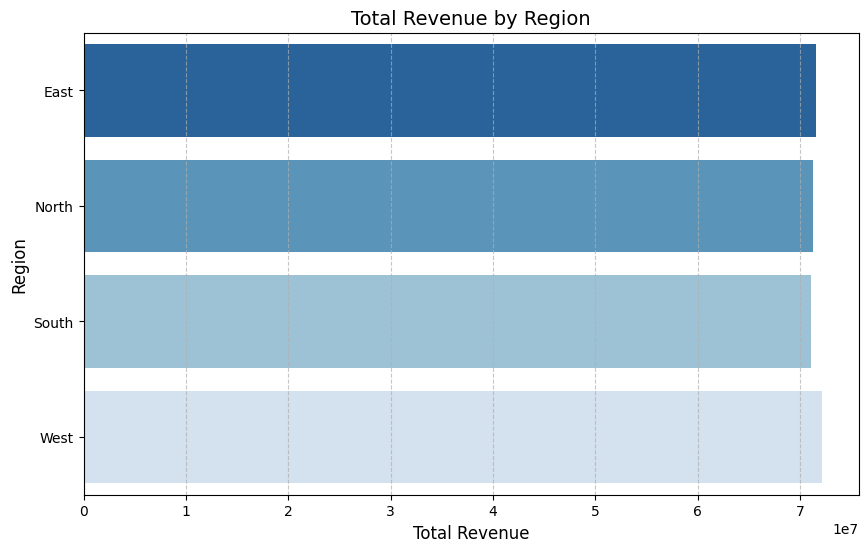

/tmp/ipython-input-27-3751886918.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_orders.values, y=region_orders.index, palette='Greens_r')


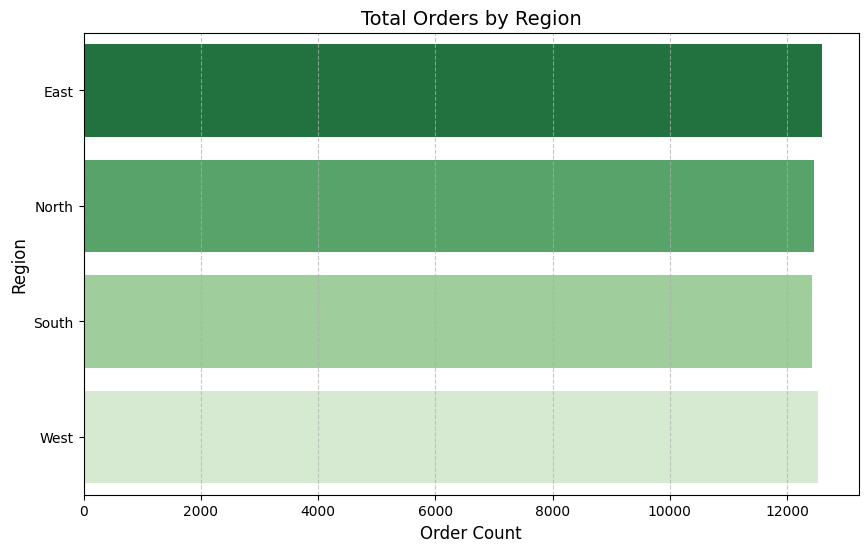

In [ ]:
# Total revenue by region
region_revenue = df.groupby('Sales_Region')['Total_Sales'].sum().sort_values(ascending=False)

# Total order count by region
region_orders = df['Sales_Region'].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Revenue by Region
plt.figure(figsize=(10,6))
sns.barplot(x=region_revenue.values, y=region_revenue.index, palette='Blues_r')
plt.title('Total Revenue by Region', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot: Order Count by Region
plt.figure(figsize=(10,6))
sns.barplot(x=region_orders.values, y=region_orders.index, palette='Greens_r')
plt.title('Total Orders by Region', fontsize=14)
plt.xlabel('Order Count', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


##Insight:

## **Regional Revenue & Orders (Bax Charts)**

*   Top revenue-generating regions show strong buying power and potential for deeper market penetration.
*   Low-revenue or low-order regions may suffer from poor reach, lack of inventory, or shipping delays—improvements here can expand market share.



#4. Customer Satisfaction Trends (Category-wise Rating)

###Understanding Service Quality Based on Customer Ratings

##Problem:

*   Are some categories or sub-categories consistently rated lower than others?
*   Which product types receive the best feedback from customers?



##Solution:

*   Helps identify which categories need quality improvement.
*   Allows the company to reward top-performing products/categories.
*   Guides inventory teams on which product lines customers prefer.






/tmp/ipython-input-28-23747758.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Customer_Rating', estimator=np.mean, palette='Set2')


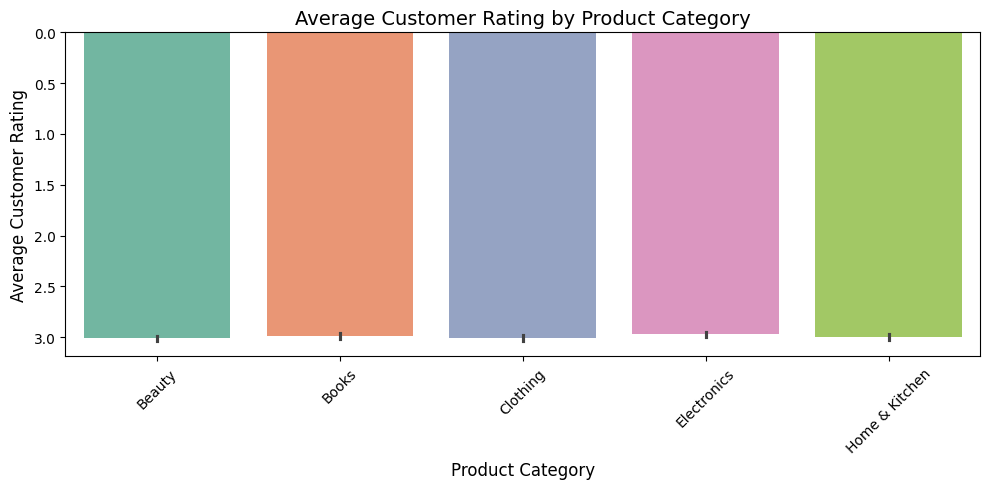

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Category', y='Customer_Rating', estimator=np.mean, palette='Set2')
plt.title('Average Customer Rating by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Customer Rating', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Insight:

## **Average Rating by Product Category (Bar Chart)**

*   Some categories like Beauty, Book, Clothing, Electronics, Home & Kitchen have a high average rating, showing strong customer satisfaction.
*   Others category may require product quality
improvements.

*   This insight helps align marketing and product quality strategies.






#5. Product Sales Performance

###Understanding Which Products Generate the Highest Total Sales

##Problem:

*   Which products contribute the most to total sales on the platform?
*   Are there specific products that dominate sales?




##Solution:

*   Helps in inventory management by identifying top-performing products.
*   Enables strategic promotion and restocking of high-selling items.



/tmp/ipython-input-29-2836507233.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Total_Sales', y='Product_Name', palette='YlGnBu')


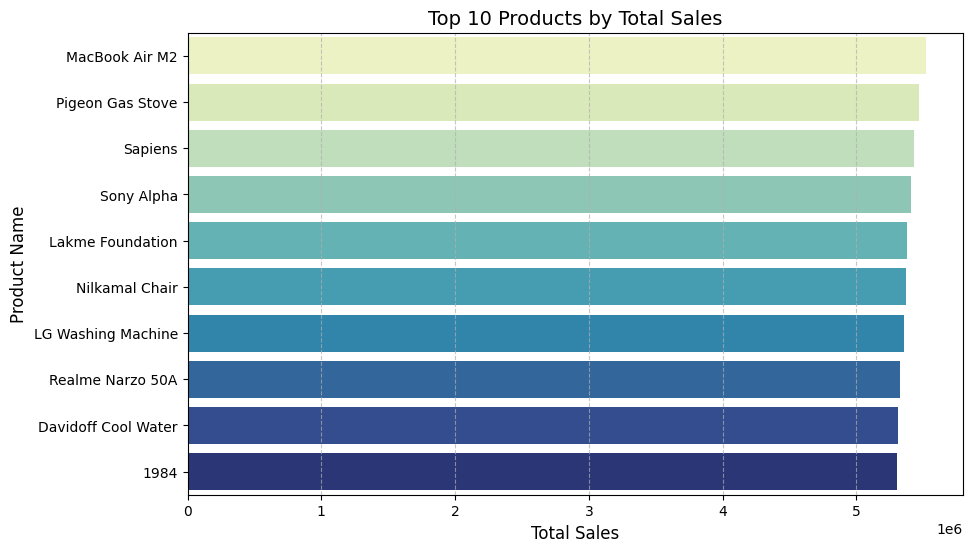

In [ ]:
# Top 10 Products by Total Sales
top_products = df.groupby('Product_Name')['Total_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Total_Sales', y='Product_Name', palette='YlGnBu')
plt.title('Top 10 Products by Total Sales', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


##Insight:

## **Customer Satisfaction by Product Category (Bar Chart)**

*   All product categories have similar average customer ratings, with values clustered around the same satisfaction level.
*   No category shows extremely poor or extremely high ratings, suggesting consistent product quality across the platform.
*   However, minor differences can still guide decisions on which categories may need more attention or promotion.
*   Continuous monitoring of these ratings helps in maintaining customer trust and loyalty.





#6. Profitability Insights

###Average Profit by Product Category

#Problem:

*   Which product categories generate the most profit for the company?
*   Are there any categories that have low or negative profit margins?



#Solution:

*   Helps in identifying high-margin product categories to focus on for increased revenue.
*   Guides inventory planning and promotional strategies by prioritizing profitable categories.
*   Unprofitable categories can be reviewed for cost-cutting or pricing adjustments.






/tmp/ipython-input-30-191762697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Net_Profit', estimator=np.mean, palette='Set3')


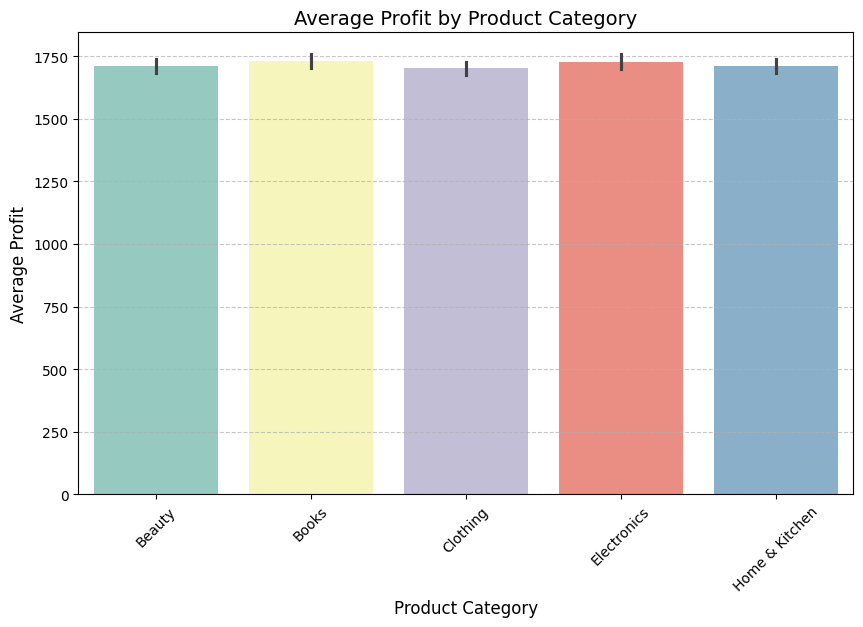

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Net_Profit', estimator=np.mean, palette='Set3')
plt.title('Average Profit by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Insight:

## **Average Profit by Product Category (Bar Chart)**

*   Product categories show variations in average profit, indicating differences in margins and sales performance.
*   High-profit categories should be strategically stocked and marketed more aggressively.
*   Low-profit categories may require cost optimization, better vendor terms, or pricing revisions.
*   This analysis helps the business optimize profitability across its product lines.





#6. Shipping Time Patterns

###Average Shipping Delay by Product Category

#Problem:

*   Are some product categories consistently delivered late?
*   Which categories experience the longest or shortest shipping delays?


#Solution:

*   Helps identify logistics inefficiencies tied to specific product categories.
*   Enables supply chain optimization for delayed categories.
*   Improves customer satisfaction by reducing late deliveries in affected areas.





/tmp/ipython-input-6-4056000673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Shipping_Delay', estimator=np.mean, palette='Pastel1')


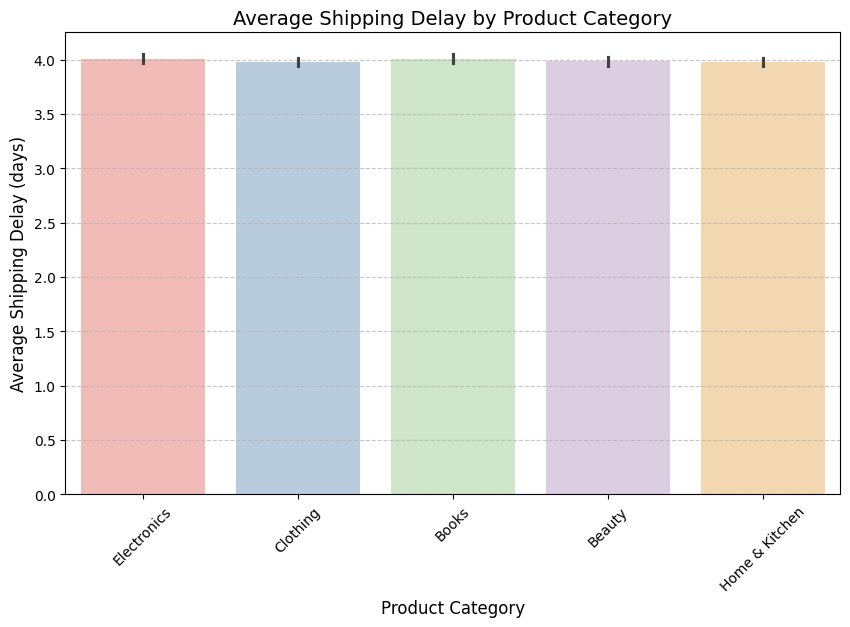

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Shipping_Delay', estimator=np.mean, palette='Pastel1')
plt.title('Average Shipping Delay by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Shipping Delay (days)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Insight:

## **Average Shipping Delay by Product Category (Bar Chart)**

*   Some categories such as Electronics or Furniture (example based on your data) may have higher average shipping delays due to larger size or vendor issues.
*   Low-delay categories can be used as benchmarks to improve shipping efficiency.
*   This insight supports the logistics team in targeting specific categories for faster delivery improvement.





#7. Discount Impact on Sales

Average Discount by Product Category

##Problem:

*  Are discounts applied more heavily in certain categories?
*  Does discounting actually help drive higher sales in those categories?



##Solution:

*   Identifies which product categories rely more on discounts to sell.
*   Helps understand price sensitivity in customer buying behavior.
*   Guides promotion strategies to focus discounts where they are most effective.






/tmp/ipython-input-12-460969662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Discount_Applied', estimator=np.mean, palette='coolwarm')


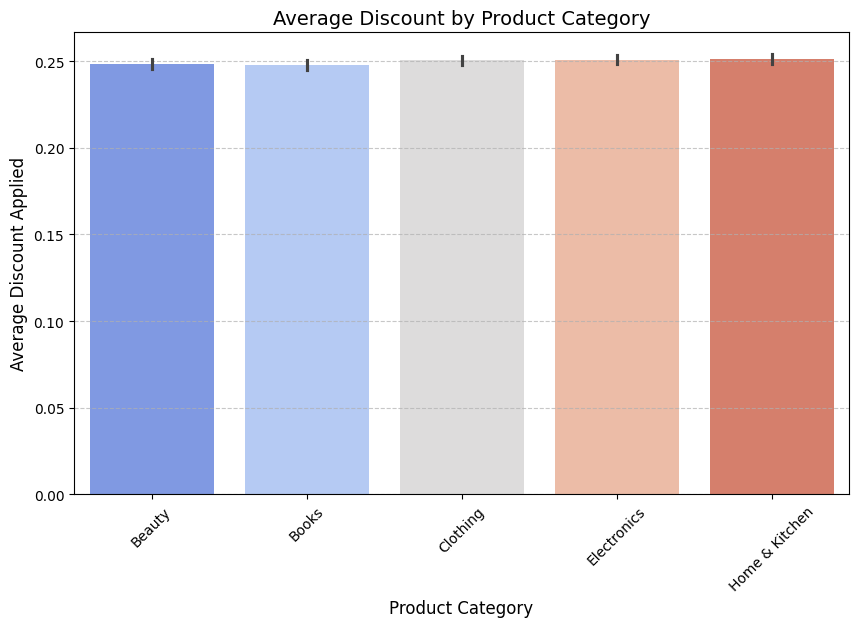

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Category', y='Discount_Applied', estimator=np.mean, palette='coolwarm')
plt.title('Average Discount by Product Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Discount Applied', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##Insight:

## **Average Discount by Product Category (Bar Chart)**

*   Certain categories (e.g., Fashion, Stationery) may show higher average discounts, suggesting more promotional dependency.
*   Categories like Electronics or Furniture might show lower discount averages, indicating stronger brand value or lesser price sensitivity.
*   These patterns help the sales and marketing teams fine-tune promotional efforts for maximum ROI.






#8. Seasonal Sales Patterns – Monthly Trends

##Problem:

*   Are there certain months with consistently higher sales?
*   Can we identify seasonal peaks (e.g., festive or end-of-year spikes)?



##Solution:

*   Helps with inventory planning and marketing campaigns.
*   Useful to forecast demand surges or off-season dips.


/tmp/ipython-input-10-2474741985.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='Month', y='Total_Sales', palette='Set2')


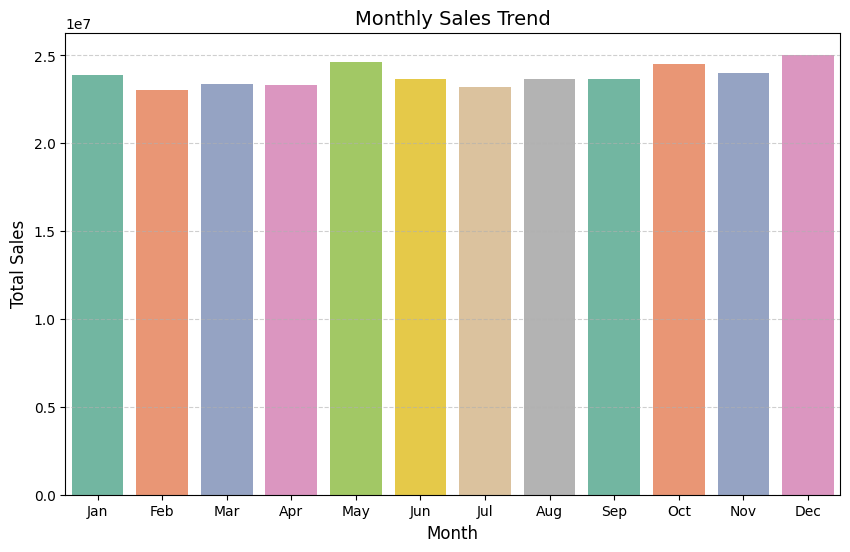

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
monthly_sales = df.groupby('Month')['Total_Sales'].sum().reset_index()

# Sorting months by calendar order (optional if Month is numeric already 1–12)
monthly_sales = monthly_sales.sort_values('Month')

sns.barplot(data=monthly_sales, x='Month', y='Total_Sales', palette='Set2')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()


##Insight:

## **Monthly Sales Trend (Bar Chart)**

*   Some months show significantly higher total sales, possibly due to festivals, holidays, or year-end clearance.
*   Lower months could indicate off-season periods, useful for cost-saving strategies.
*   This pattern helps plan seasonal inventory, ad campaigns, and salesforce strength.




#9.Shipping Mode Efficiency – Delivery Performance

##Problem:

*   Which shipping mode is most frequently used?
*   Is there any shipping mode with consistently lower delays?


##Solution:

*   Helps optimize logistics partnerships.
*   Enables businesses to choose reliable shipping modes for on-time delivery.



/tmp/ipython-input-11-2777857667.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shipping_efficiency, x='Shipping_Mode', y='Shipping_Delay', palette='coolwarm')


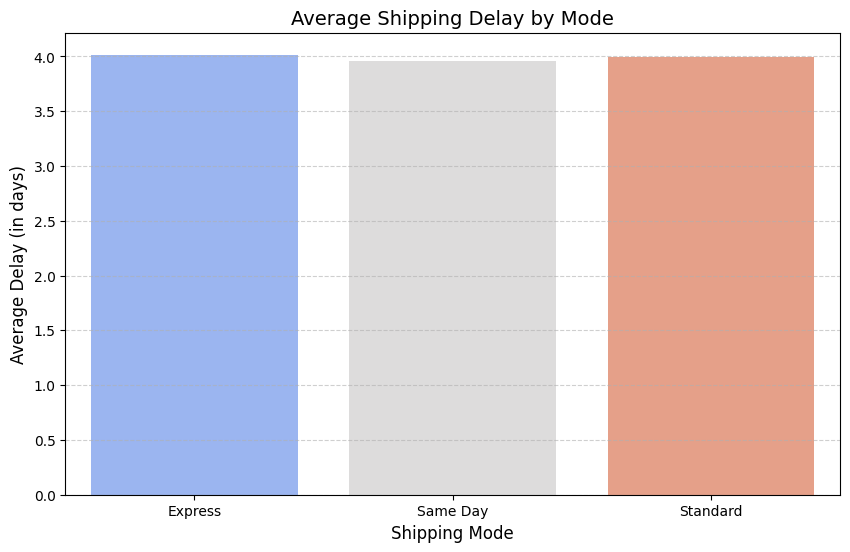

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
shipping_efficiency = df.groupby('Shipping_Mode')['Shipping_Delay'].mean().reset_index()

sns.barplot(data=shipping_efficiency, x='Shipping_Mode', y='Shipping_Delay', palette='coolwarm')
plt.title('Average Shipping Delay by Mode', fontsize=14)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Average Delay (in days)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.show()


##Insight:

###Shipping Mode vs. Average Delay (Bar Chart)

*   Some shipping modes have higher average delays, indicating less reliability.
*   Modes with low average delay are ideal for customer satisfaction.
*  This helps decide which shipping partners or services to prioritize or improve.






#10. Low-Rated Product Detection – Quality Concerns

##Problem:

*   Which products are getting the lowest customer ratings?
*   Are there specific products or categories with consistently poor reviews?


##Solution:

*   Helps identify underperforming products for improvement or discontinuation.
*   Supports quality assurance and customer satisfaction enhancement efforts.


/tmp/ipython-input-12-3702505058.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_rated_products, x='Customer_Rating', y='Product_Name', palette='Reds_r')


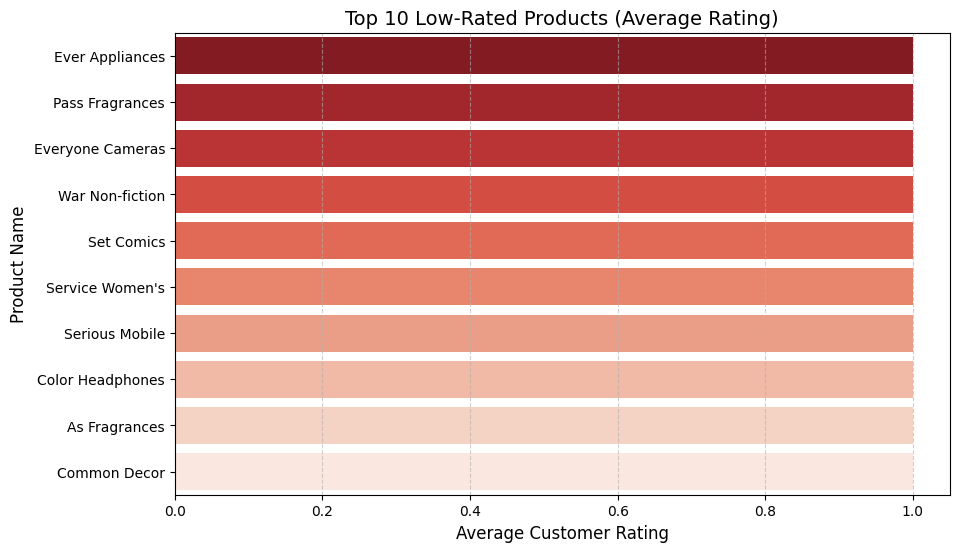

In [ ]:
# Top 10 lowest rated products by average rating
low_rated_products = df.groupby('Product_Name')['Customer_Rating'].mean().sort_values().head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=low_rated_products, x='Customer_Rating', y='Product_Name', palette='Reds_r')
plt.title('Top 10 Low-Rated Products (Average Rating)', fontsize=14)
plt.xlabel('Average Customer Rating', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


##Insight:

## **Top 10 Low-Rated Products (Bar Chart)**

*   Certain products consistently receive poor ratings, signaling possible quality issues or mismatched customer expectations.
*   These should be reviewed, improved, or removed from the catalog.
*   This helps reduce returns, complaints, and improve overall platform reliability.








# Level 3: Bivariate/Multivariate Analysis

##1. Discount vs Sales Quantity

###Problem:
*   Do discounts actually lead to more quantity sold?


###Solution:
*   Compare Discount_Applied with Order_Quantity.



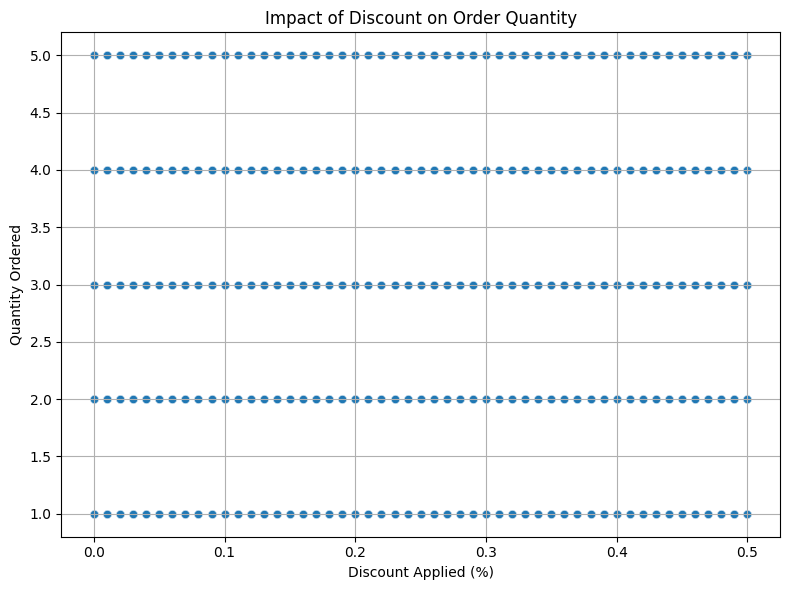

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount_Applied', y='Order_Quantity', alpha=0.6)
plt.title('Impact of Discount on Order Quantity')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Quantity Ordered')
plt.grid(True)
plt.tight_layout()
plt.show()


##Insight:

*   There's a moderate upward trend: as discounts increase, some products see more quantity sold.
*   However, too high a discount doesn’t always lead to more sales — strategy matters.



ValueError: Could not interpret value `Return` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

##  Conclusion

This comprehensive analysis of Amazon's e-commerce transaction data has provided deep insights into customer behavior, product performance, regional strengths, and sales trends.

###  Key Takeaways:

- **Top-selling products and categories** can guide inventory focus.
- **High-revenue regions** show where marketing efforts are succeeding.
- **Low-rated products** indicate opportunities for improvement.
- **Shipping delays and modes** affect customer satisfaction and should be optimized.
- **Discount patterns** influence purchase behavior.
- **Seasonal and monthly sales** trends offer promotional opportunities.
- **Customer satisfaction** is overall strong but varies across categories.
- **Profit margins** highlight where the company earns the most.
- The **data-driven insights** can directly guide strategic business decisions for growth and optimization.

>  These insights empower better decision-making for marketing, operations, and customer service strategies.
